In [38]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

In [39]:
n = 30
dim = 2
k = 5
points = np.random.randint(1,2*n,(n,dim))

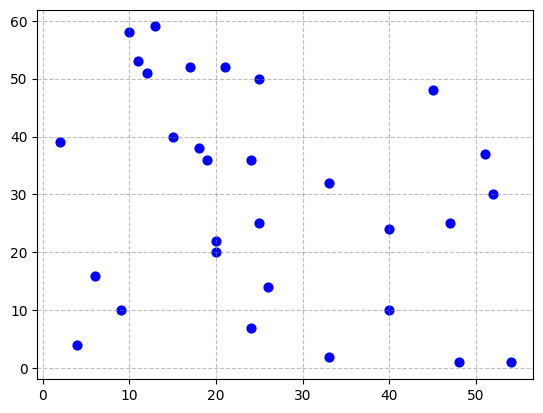

In [40]:
plt.scatter(points[:,0],points[:,1],s=40,c='b')
plt.grid(c='grey',alpha=0.5,linestyle='--')
plt.show()

In [41]:
def generateDistances(points,centers):
    a = points.shape[0]
    b = centers.shape[0]
    distance = np.zeros((a,b))
    for i in range(a):
        for j in range(b):
            distance[i][j] = np.linalg.norm(points[i]-centers[j])
    return distance

In [42]:
def findNextCenter(points,centers):
    a = points.shape[0]
    distance = generateDistances(points,centers)
    closest_center_distances = np.amin(distance,axis=1)
    dmax = np.max(closest_center_distances)
    for i in range(a):
        if dmax == closest_center_distances[i]:
            return points[i]

In [43]:
def formClusters(points,centers):
    a = points.shape[0]
    b = centers.shape[0]
    distance = generateDistances(points,centers)
    closest_center_distances = np.amin(distance,axis=1)
    dmax = np.max(closest_center_distances)
    closest_center_distances_indices = np.argmin(distance,axis=1)
    return closest_center_distances_indices,dmax

In [44]:
centers = np.zeros((k,dim))
# c0 = points[np.random.randint(0,n)]
c0 = points[0]
centers[0]=c0
for i in range(1,k):
    cnew = findNextCenter(points,centers[:i,:])
    centers[i] = cnew

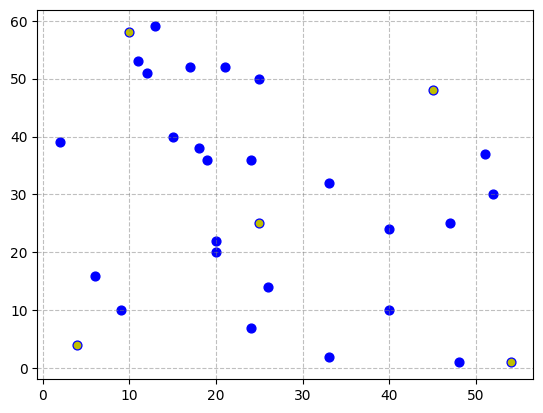

In [45]:
plt.scatter(points[:,0],points[:,1],s=40,c='b')
plt.scatter(centers[:,0],centers[:,1],s=20,c = 'y')
plt.grid(c='grey',alpha=0.5,linestyle='--')
plt.show()

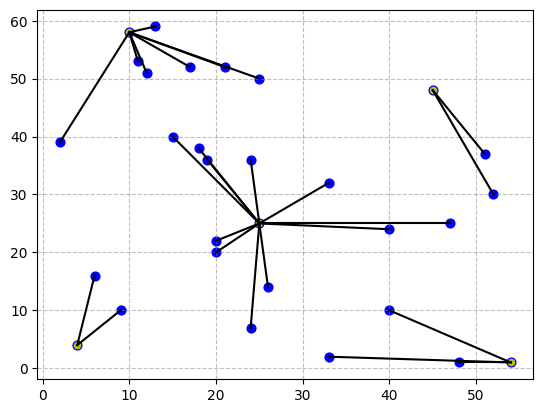

In [46]:
labels,cost = formClusters(points,centers)
plt.scatter(points[:,0],points[:,1],s=40,c='b')
plt.scatter(centers[:,0],centers[:,1],s=20,c = 'y')
for i in range(n):
    plt.plot([points[i,0],centers[labels[i]][0]],[points[i,1],centers[labels[i]][1]],color='black')
plt.grid(c='grey',alpha=0.5,linestyle='--')
plt.show()

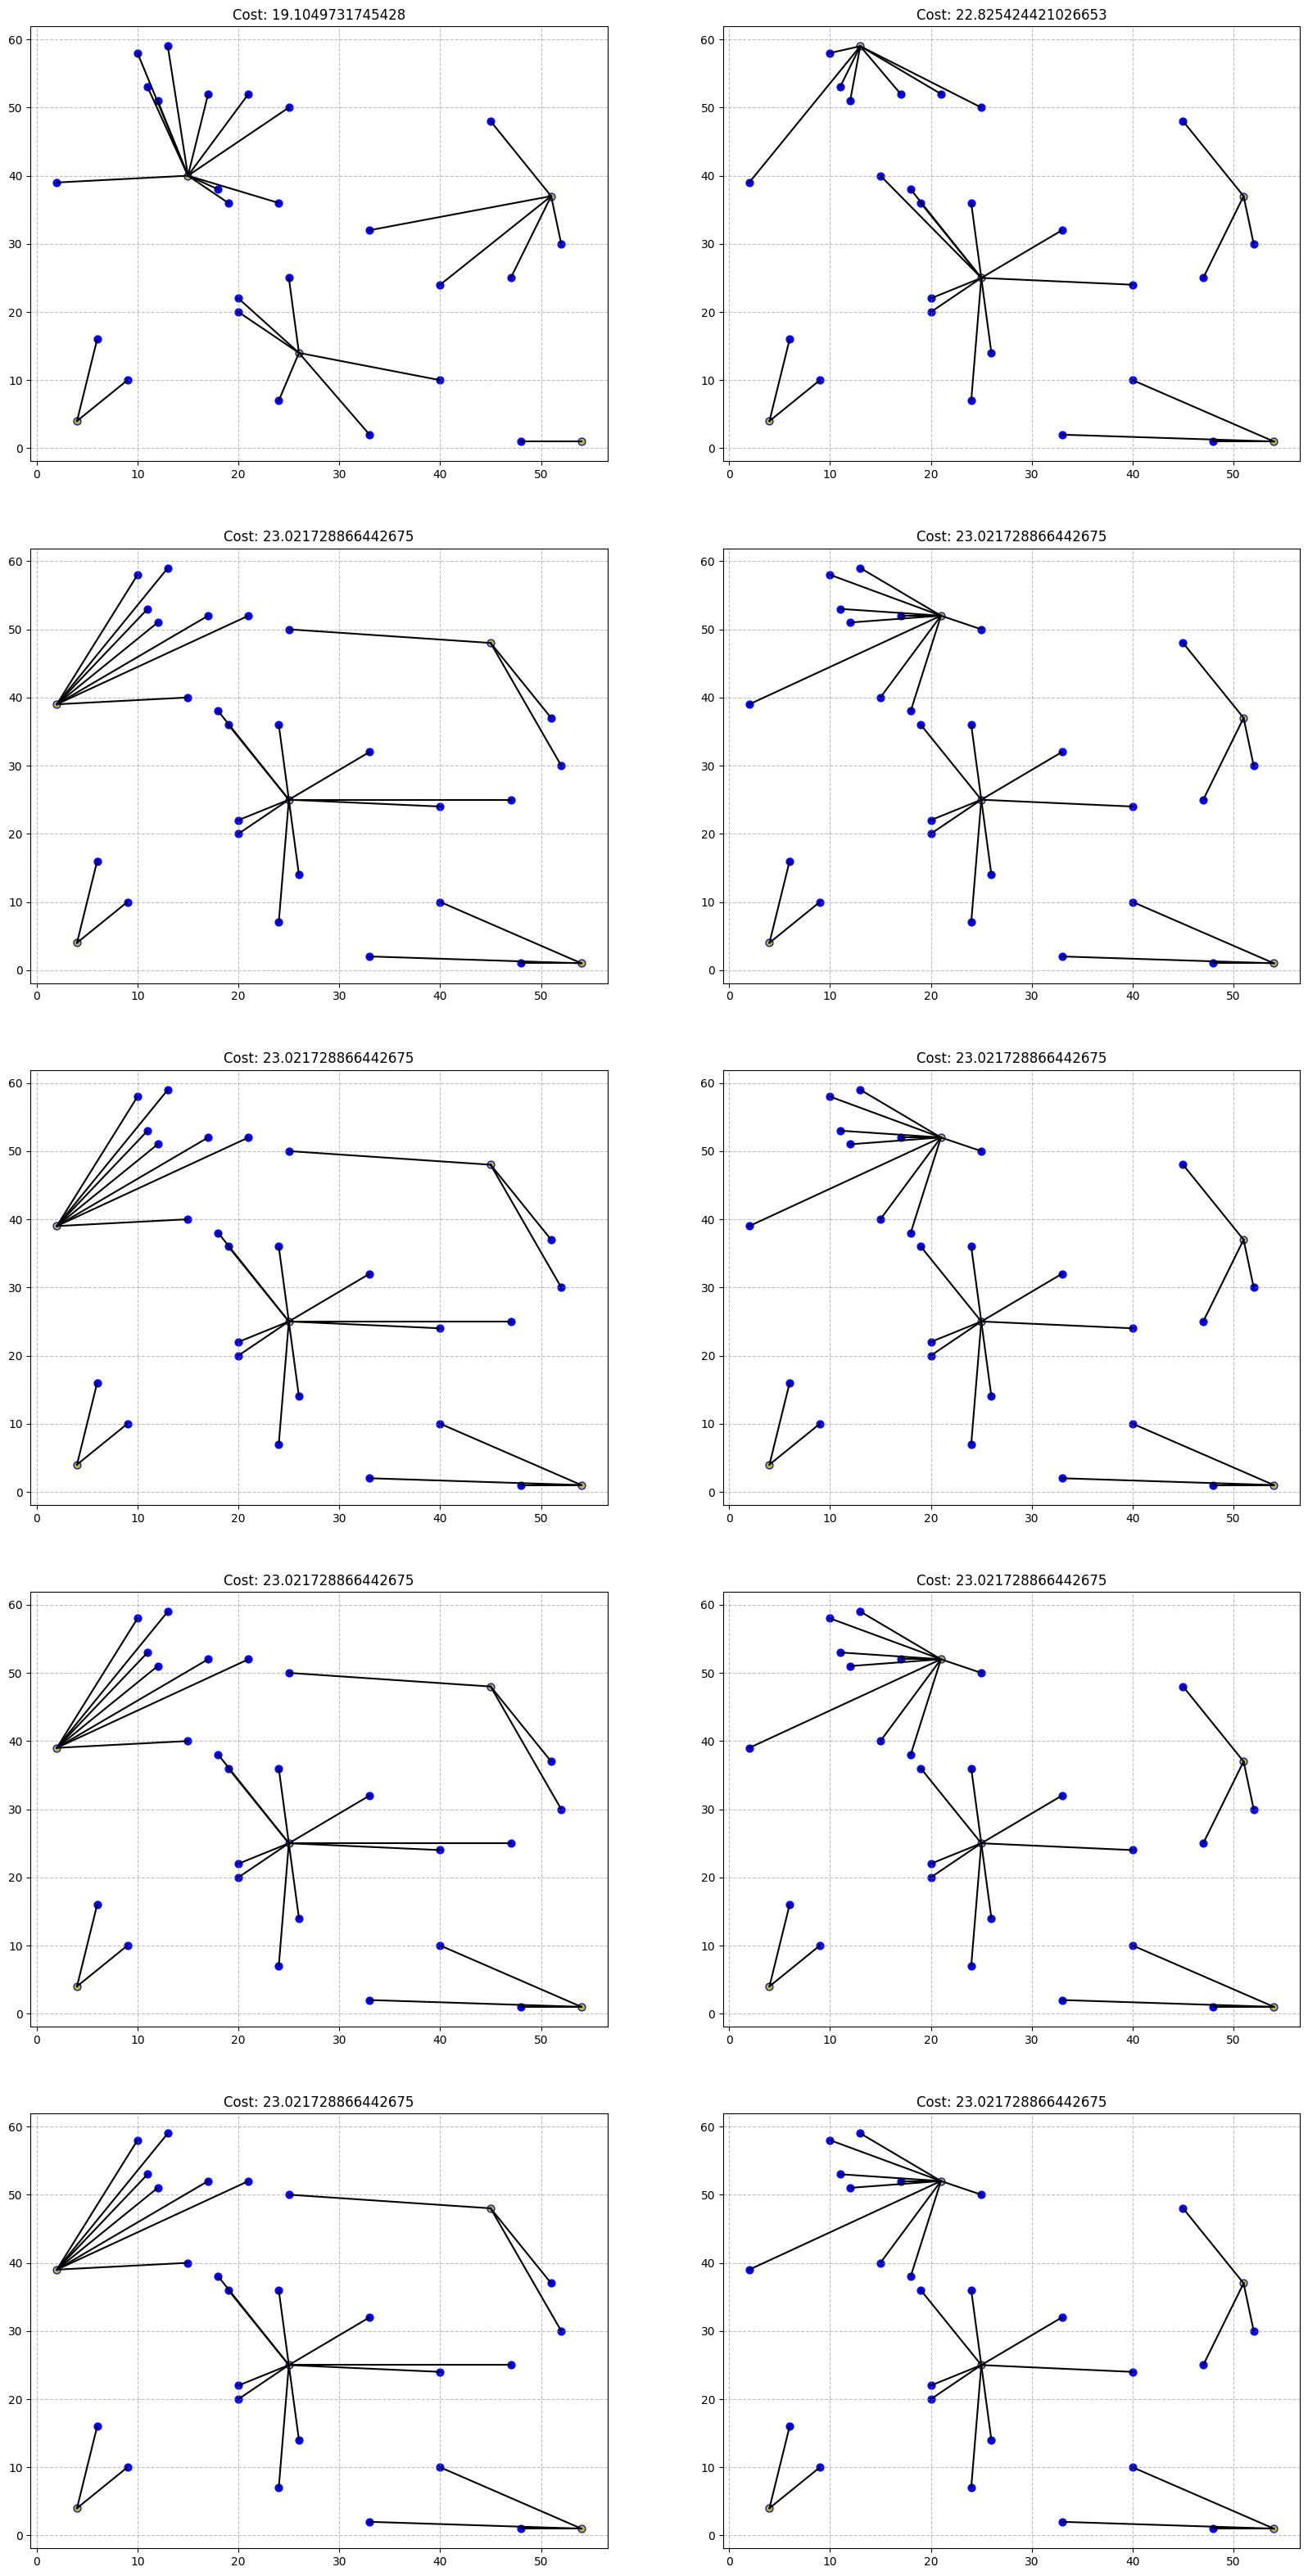

In [47]:
iter = 10
fig,ax = plt.subplots(5,2,figsize = (20,40))
c0 = points[np.random.randint(0,n)]
for j in range(iter):
    centers = np.zeros((k,dim))
    centers[0]=c0
    for i in range(1,k):
        cnew = findNextCenter(points,centers[:i,:])
        centers[i] = cnew
    labels,cost = formClusters(points,centers)
    plt.subplot(5,2,j+1)
    plt.scatter(points[:,0],points[:,1],s=40,c='b')
    plt.scatter(centers[:,0],centers[:,1],s=20,c = 'y')
    for i in range(n):
        plt.plot([points[i,0],centers[labels[i]][0]],[points[i,1],centers[labels[i]][1]],color='black')
    plt.grid(c='grey',alpha=0.5,linestyle='--')
    plt.title(f'Cost: {cost}')
    c0 = findNextCenter(points,centers)

plt.show()

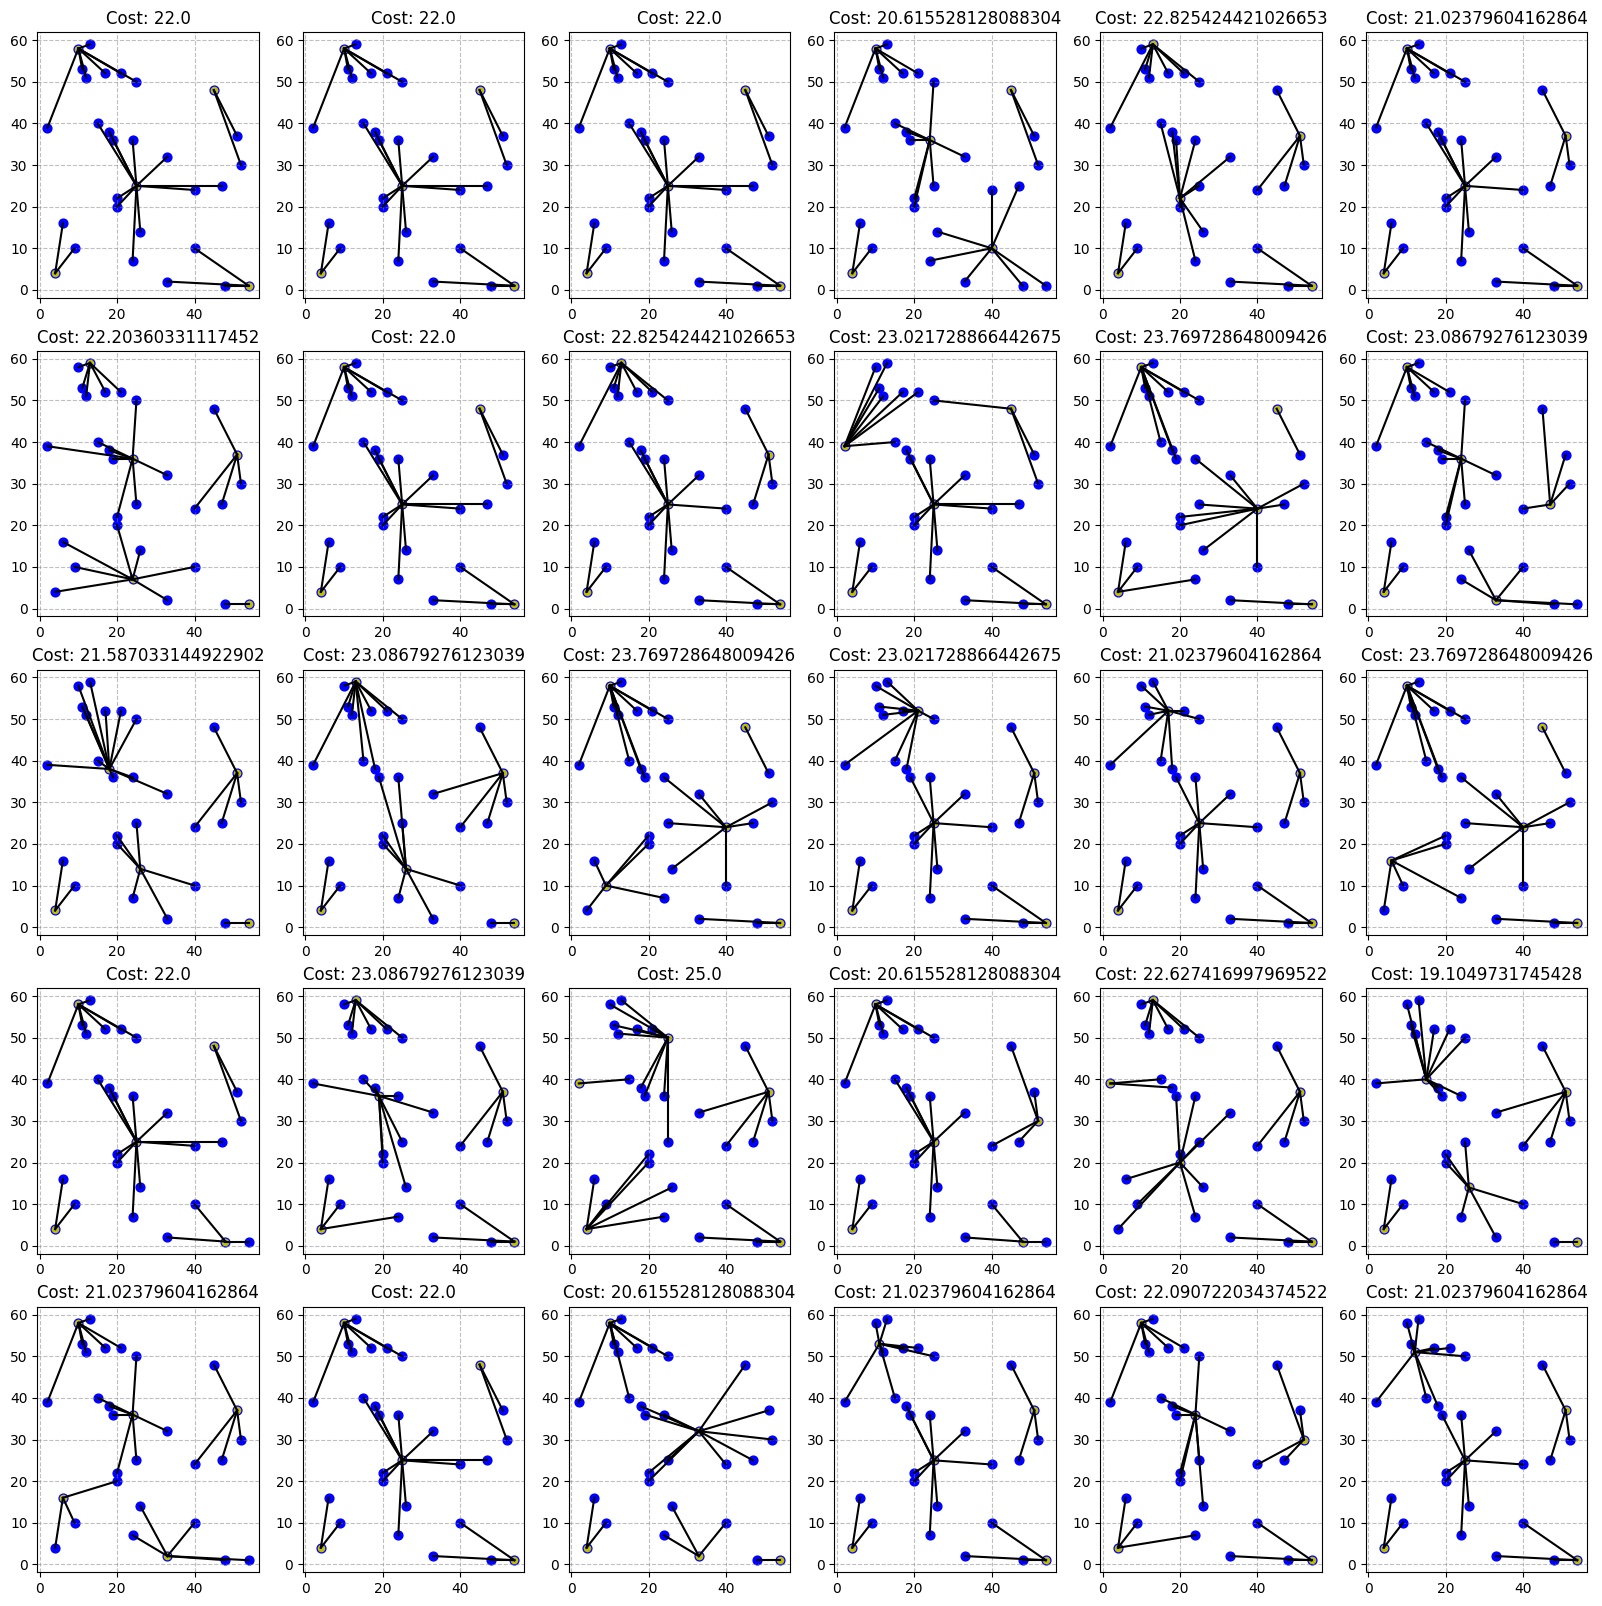

In [48]:
iter = n
fig,ax = plt.subplots(5,6,figsize = (20,20))
for j in range(iter):
    c0 = points[j]
    centers = np.zeros((k,dim))
    centers[0]=c0
    for i in range(1,k):
        cnew = findNextCenter(points,centers[:i,:])
        centers[i] = cnew
    labels,cost = formClusters(points,centers)
    plt.subplot(5,6,j+1)
    plt.scatter(points[:,0],points[:,1],s=40,c='b')
    plt.scatter(centers[:,0],centers[:,1],s=20,c = 'y')
    for i in range(n):
        plt.plot([points[i,0],centers[labels[i]][0]],[points[i,1],centers[labels[i]][1]],color='black')
    plt.grid(c='grey',alpha=0.5,linestyle='--')
    plt.title(f'Cost: {cost}')
plt.show()

In [49]:
iter = n
records = dict()
for j in range(iter):
    c0 = points[j]
    centers = np.zeros((k,dim))
    centers[0]=c0
    for i in range(1,k):
        cnew = findNextCenter(points,centers[:i,:])
        centers[i] = cnew
    labels,cost = formClusters(points,centers)
    records[j] = [cost,labels]